In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import math
import skimage
import pywt.data

convol

[0 1 2 3 4 5 6 7 8 9] h
[0 1 2 3 4 5 6 7 8 9] x
[  0   0   1   4  10  20  35  56  84 120 165 200 224 236 235 220 190 144
  81]


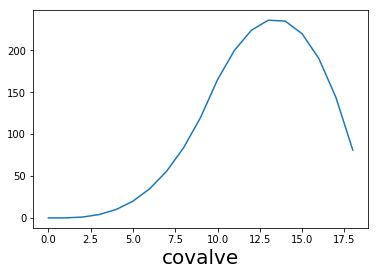

In [2]:
x=np.arange(10)
h=np.arange(10)
z=np.convolve(x,h)
plt.plot(z)
plt.xlabel('covalve',fontsize=20)
plt.show
print(h,'h')
print(x,'x')
print(z)

calculate psnr

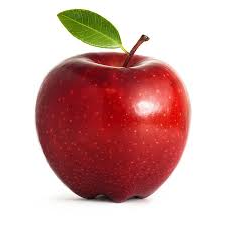

In [3]:
from PIL import Image
my_image=Image.open("D:\S.png")
my_image1=Image.open("D:\SS.png")
my_image

In [4]:
pic = cv2.imread("my_image")
pic=skimage.img_as_float(my_image)
picture = cv2.imread("my_image1")
picture=skimage.img_as_float(my_image1)
mse=np.mean((pic - picture)**2)
pix_max=255.0
psnr=math.log10(pix_max/math.sqrt(mse))
print(psnr)


3.145243553279859


FOURIER TRANSFORM

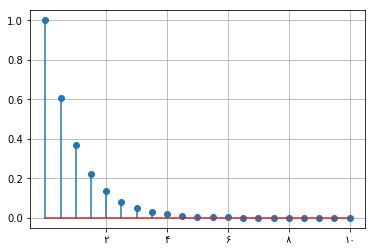

In [5]:
from scipy.fftpack import fft

t = np.arange(0, 10.5, step=0.5)
time_serie = np.exp(-t)

plt.figure()
plt.stem(t, time_serie)
plt.grid(True)
plt.xticks([2, 4, 6, 8, 10], 
           ["۲", "۴", "۶", "۸", "۱۰"])
plt.show()


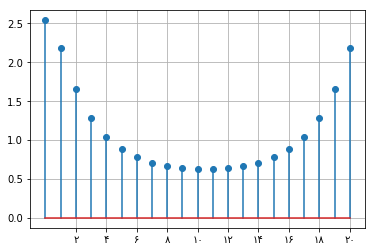

In [6]:
fourier_trans = fft(time_serie)

plt.figure()
plt.stem(np.abs(fourier_trans))
plt.grid(True)
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 
           ["۲", "۴", "۶", "۸", "۱۰", "۱۲", "۱۴", "۱۶", "۱۸", "۲۰"])
plt.show()

wavelet

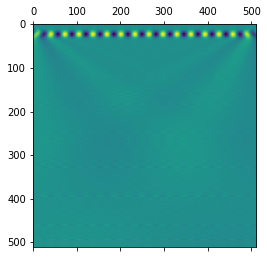

In [7]:
import pywt
num_steps = 512
x = np.arange(num_steps)
y = np.sin(2*np.pi*x/32)

delta_t = x[1] - x[0]
scales = np.arange(1,num_steps+1)
wavelet_type = 'morl'
coefs, freqs = pywt.cwt(y, scales, wavelet_type, delta_t)
plt.matshow(coefs) 
plt.show()

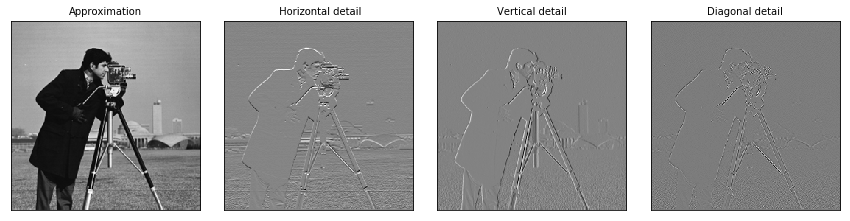

In [8]:
original = pywt.data.camera()
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

Laplacian Pyramid

In [ ]:
import numpy as np
import cv2
import math


def conv(im, size_y, size_x, t, t_size_h, t_size_w, grey_level=0):
    if t_size_h%2==0:
        t_size_h+=1
    if t_size_w%2==0:
        t_size_w+=1
    clone = np.zeros_like(im)
    kh = t_size_h
    kw = t_size_w
    hh = kh//2
    hw = kw//2
    if grey_level==0:
        for y in range(hh, size_y-(kh-hh)):
            for x in range(hw, size_x-(kw-hw)):
                sum = [0,0,0]
                for j in range(kh):
                    jj = kh - 1 - j
                    for i in range(kw):
                        ii = kw - 1 - i
                        rx = x + i - hw
                        ry = y + j - hh
                        sum[0] += im[ry,rx,0]*t[jj][ii]
                        sum[1] += im[ry,rx,1]*t[jj][ii]
                        sum[2] += im[ry,rx,2]*t[jj][ii]
                clone[y,x,0]=sum[0]
                clone[y,x,1]=sum[1]
                clone[y,x,2]=sum[2]
    else:
        for y in range(hh, size_y-(kh-hh)):
            for x in range(hw, size_x-(kw-hw)):
                sum = 0
                for j in range(kh):
                    jj = kh - 1 - j
                    for i in range(kw):
                        ii = kw - 1 - i
                        rx = x + i - hw
                        ry = y + j - hh
                        sum += im[ry,rx]*t[jj][ii]
                clone[y,x]=sum
    return clone

def gaus_m(sigma, winsize):
    c1 = 1/(2*math.pi*sigma*sigma)
    c2 = 1/(2*sigma*sigma)
    centre = winsize//2+1
    sum = 0
    template = np.zeros((winsize,winsize))
    for i in range(winsize):
        for j in range(winsize):
            template[j,i]= c1*math.exp(-c2*((j-centre)**2+(i-centre)**2))
            sum += template[j,i]
    template/=sum
    return template

sigma_1 = float(input('Input sigma for a low pass filter: '))
#sigma_1 = 2
size_1 = int(8*sigma_1+1)
size_1 = int(input('Input matrix size (preferably ) '+str(size_1)+': '))
if size_1%2==0: size_1+=1

gaus_mtr_1 = np.zeros((size_1,size_1))
gaus_mtr_1 = gaus_m(sigma_1, size_1)

sigma_2 = float(input('Input sigma for a high pass filter: '))
size_2 = int(8*sigma_2+1)
size_2 = int(input('Input matrix size (preferably ) '+str(size_2)+': '))
if size_2%2==0: size_2+=1

gaus_mtr_2 = np.zeros((size_2,size_2))
gaus_mtr_2 = gaus_m(sigma_2, size_2)

print ('which images pair do you choose to hybrid?')
print ('1.dog-cat')
print ('2.Marilyn-Einstein')
print ('3.motorcycle-bicycle')
print ('4.fish-submarine')
print ('5.airplane-bird')
choise = int(input())
if choise==1:
    name_smooth = 'dog.bmp'
    name_thresh = 'cat.bmp'
elif choise==2:
    name_smooth = 'marilyn.bmp'
    name_thresh = 'einstein.bmp'
elif choise==3:
    name_smooth = 'motorcycle.bmp'
    name_thresh = 'bicycle.bmp'
elif choise==4:
    name_smooth = 'fish.bmp'
    name_thresh = 'submarine.bmp'
else:
    name_smooth = 'plane.bmp'
    name_thresh = 'bird.bmp'
grey_ = int(input('input 1, if gray image, 0 if RGB: '))

if grey_==0:
    cat = cv2.imread(name_thresh).astype(float)
    dog = cv2.imread(name_smooth).astype(float)
    x_dog, y_dog, t_dog = dog.shape
else:
    cat = cv2.imread(name_thresh,0).astype(float)
    dog = cv2.imread(name_smooth,0).astype(float)
    x_dog, y_dog = dog.shape

dog = conv(dog, x_dog, y_dog, gaus_mtr_1, size_1, size_1,grey_)
cat =  dog+ cat - conv(cat, x_dog, y_dog, gaus_mtr_2, size_2, size_2,grey_)
if (grey_==0):
    for i in range(x_dog):
        for j in range(size_2//2+1):
            cat[i,j]=[0,0,0]
        for j in range(y_dog-size_2//2-1,y_dog):
            cat[i,j]=[0,0,0]
    for i in range(y_dog):
        for j in range(size_2//2+1):
            cat[j,i]=[0,0,0]
        for j in range(x_dog-size_2//2-1,x_dog):
            cat[j,i]=[0,0,0]
else:
    for i in range(x_dog):
        for j in range(size_2//2+1):
            cat[i,j]=0
        for j in range(y_dog-size_2//2-1,y_dog):
            cat[i,j]=0
    for i in range(y_dog):
        for j in range(size_2//2+1):
            cat[j,i]=0
        for j in range(x_dog-size_2//2-1,x_dog):
            cat[j,i]=0

cv2.imwrite('dog_1.png',dog)
cv2.imwrite('cat_1.png',cat)
cv2.imshow("outImg", cat/255)
cv2.waitKey(0)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

#mass_n = int(input("Input size of matrix convolution n: "))
#mass_m = int(input("Input size of matrix convolution m: "))
#grey_ = int(input("If grey picture, input 1, else input 0"))
#standart_dev = float(input("Input standart deviation: "))


dog = cv2.imread('D:\computer_vision\dog.bmp')
cat = cv2.imread('D:\computer_vision\cat1.bmp')

# convolution!!!!

def con(im, mass, mass_n, mass_m):
    kh = mass_n
    kw = mass_m
    hh = kh // 2
    hw = kw // 2
    im_h, im_w, t = im.shape
    im_result = np.zeros_like(im)
    for y in range(hh, im_h-(kh-hh)):
        for x in range(hw, im_w-(kw-hw)):
            sum = [0,0,0]
            for j in range(kh):
                jj = kh - j -1
                for i in range(kw):
                    ii = kw - i -1
                    rx = x+i-hw
                    ry = y+j-hh
                    b = im[ry,rx,0]
                    g = im[ry,rx,1]
                    r = im[ry,rx,2]
                    sum[0] += b*mass[jj][ii]
                    sum[1] += g*mass[jj][ii]
                    sum[2] += r*mass[jj][ii]
            im_result[y, x] = sum
    return im_result

# gaus massiv
grey_ = 0
sigma = 0.9

size = int(8*sigma + 1)
if size%2 == 0: size+=1

gaus_m = np.zeros((size,size))
centre = size//2+1
sum = 0
for i in range(size):
    for j in range(size):
        gaus_m[j,i] = 1/(2*math.pi*sigma**2)*math.exp(-(((j-centre)*(j-centre))+((i-centre)*(i-centre)))/(2*sigma*sigma))
        sum = sum + gaus_m[j,i]
gaus_m = gaus_m/sum

#high pass matrix
mtr = [[0.002, 0.013, 0.220, 0.013, 0.002],
       [0.013, 0.060, 0.098, 0.060, 0.013],
       [0.220, 0.098, 0.162, 0.098, 0.220],
       [0.013, 0.060, 0.098, 0.060, 0.013],
       [0.002, 0.013, 0.220, 0.013, 0.002]]
s1 = np.sum(mtr)
mtr /= s1
mtr_size = 5


dog_clon = con(dog,gaus_m,size,size)
cat_clon = con(cat,gaus_m,size,size)

plt.figure(1)
plt.subplot(121)
plt.imshow(cv2.cvtColor(dog_clon, cv2.COLOR_BGR2RGB))
plt.axis('off')


ht, wt, t = cat.shape
cat_clon1 = np.zeros_like(cat)
for i in range(ht):
    for j in range(wt):
        cat_clon1[i,j] = cat[i,j] - cat_clon[i,j]+dog_clon[i,j]


#dog_clon = con(dog, gaus_m, size, size)
#cat_clon = con(cat, high_pass, size, size)


plt.subplot(122)
#plt.imshow(cv2.cvtColor(dog, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(cat_clon1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

